## 선형회귀(Linear Regression) - 심화

#### Linear Regression을 활용하여 섭씨온도(C, Celsius)를 화씨온도(F, Fahrenheit)로 변환해주는 공식을 만들수 있다. 
섭씨온도과 화씨온도의 관계는 앞에서 우리가 살펴보았던 선형회귀의 관계를 가지고 있다.
#### H(x) = aX + b 에서처럼, F = C*1.8 +32 
이때, 1.8과 32라는 값을 모르고 있다고 가정하고, 머신러닝 알고리즘을 이용해서 주어진 섭씨 온도와 화씨온도 데이타 만으로 이 값들을 찾아내는 실습을 진행해보도록 하겠다.
Chain Rule 증명 ----> 구글 검색 하면 여기에 사용되는 증명 공식들,,미분, 편미분..공식들이 나온다.참조바람

### Configuration (or prerequisite)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Generate Dataset

#### 선형회귀 문제를 다루기 위한 학습용 데이타셋을 생성
0도에서 100도 사이의 값을 갖는 섭씨온도 데이타를 100개 만들어보자
이 데이타가 해당 머신러닝 알고리즘에서 사실상 Feature가 될 것이다.

### 섭씨온도 데이타에 상응하는 화씨온도를 생성
#### 우리가 알고있던 기존의 섭씨-화씨변환 공식을 적용해서 위 섭씨온도 데이타에 대응하는 화씨온도 데이타를 생성. 
이 데이타가 오늘 다룰 학습 모델 알고리즘의 Label이 될 것이다.

In [2]:
C = np.random.randint(low= 1,high= 101,size= 100)


In [3]:
print(C.shape)
C[:10]

(100,)


array([25,  3, 12,  1, 26, 12, 59, 90, 79, 55])

#### 섭씨 온도에 대응하는 화씨온도 만들기
    - 우리가 알고있는 기존의 섭씨 - 화씨 변환공식을 적용하기 위해서 화씨 온도를 생성
    - 이 데이터가 오늘 다룰 학습 모델의 라벨이 된다.

In [4]:
F = C*1.8+32
F

array([ 77. ,  37.4,  53.6,  33.8,  78.8,  53.6, 138.2, 194. , 174.2,
       131. , 113. , 159.8, 104. , 177.8,  68. ,  73.4, 149. , 118.4,
       122. ,  53.6, 102.2, 120.2, 183.2, 206.6, 174.2, 150.8, 186.8,
       113. ,  48.2, 201.2, 136.4, 190.4, 183.2, 152.6,  75.2, 177.8,
       102.2, 107.6, 199.4, 192.2, 183.2,  46.4,  68. , 174.2,  51.8,
       197.6,  35.6, 113. , 140. ,  44.6,  48.2, 147.2,  51.8,  62.6,
       158. , 154.4, 125.6,  91.4, 105.8, 203. ,  89.6,  77. ,  73.4,
        93.2,  82.4,  44.6,  51.8, 203. ,  82.4,  98.6, 185. , 127.4,
        57.2, 107.6,  41. , 165.2,  77. ,  89.6, 107.6, 141.8, 185. ,
       194. , 190.4,  96.8, 168.8, 181.4, 203. , 204.8, 181.4,  98.6,
       113. , 206.6, 190.4, 132.8,  86. , 185. , 105.8, 120.2,  71.6,
        87.8])

In [5]:
print(F.shape)
F[:10]

(100,)


array([ 77. ,  37.4,  53.6,  33.8,  78.8,  53.6, 138.2, 194. , 174.2,
       131. ])

### Visualization
    - 위에서 만든 Feature와 Label을 직관적으로 확인할 수 있는 선형을 그림

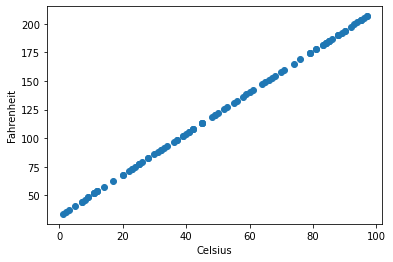

In [6]:
plt. scatter(C,F)
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.show()

### Bias (편향 찾기) -- Weight는 1.8

#### Weight는 1.8로 주고 Bias를 직관적으로 한번 찾아보겠다.

In [7]:
X = C
y = F #라벨이라 small case

In [8]:
w=1.8
b = np.random.uniform(low=-1.0,high= 1.0)

print(w,b)

1.8 0.9922909314859267


In [9]:
y_predict = w*X+b
y_predict[:10]

array([ 45.99229093,   6.39229093,  22.59229093,   2.79229093,
        47.79229093,  22.59229093, 107.19229093, 162.99229093,
       143.19229093,  99.99229093])

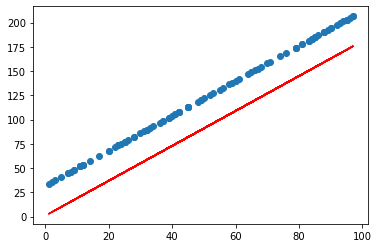

In [10]:
plt.scatter(C,F)
plt.plot(C,y_predict,c='red')
plt.show() # bias때문에 오차생김.

#### Bias 보정

In [11]:
b = b - (y_predict - y).mean() # b-=(y_predict - y).mean()
b

31.999999999999993

### 새로운 예측

In [12]:
y_predict = w * X + b
y_predict[:10]

array([ 77. ,  37.4,  53.6,  33.8,  78.8,  53.6, 138.2, 194. , 174.2,
       131. ])

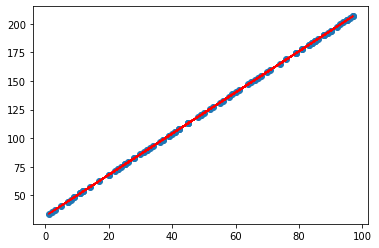

In [13]:
plt.scatter(C,F)
plt.plot(C,y_predict,c='red')
plt.show() # bias때문에 오차생김.

### 정규분포에 해당하는 weight, bias 값을 랜덤하게 초기화
    - 실제값과 예측한 결과 값 사이에 오차가 발생할 것이다.
    - 오차를 줄여가야함. loss Function이 0에 가까워져야함.

In [14]:
w = np.random.uniform(-1,1) #uniform 정규분포에 의거하여 랜덤하게 값을 추출
b = np.random.uniform(-1,1)

w,b

(-0.3215775172686699, 0.3134832591669592)

In [15]:
y_predict = w*X+b
y_predict[:10]

array([-7.72595467e+00, -6.51249293e-01, -3.54544695e+00, -8.09425810e-03,
       -8.04753219e+00, -3.54544695e+00, -1.86595903e+01, -2.86284933e+01,
       -2.50911406e+01, -1.73732802e+01])

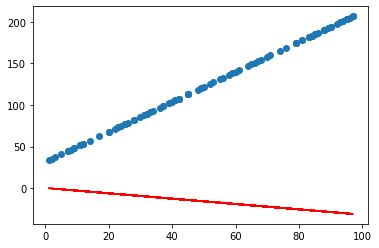

In [16]:
plt.scatter(C,F)
plt.plot(C,y_predict,c='red')
plt.show() 

### Gradient Descent

### 가중치(Weight, W), 편향(Bias, B) 찾기
#### 이제 경사하강법(Gradient Descent)을 사용하여 섭씨온도를 화씨온도로 변환해줄 주 있는 공식을 찾아보겠다.
공식의 세부내용은 모른다치고, 두 변수(X,y)가 선형(Linear)과 관계있음을 가정(y=X * w + b)하여 가중치(weight)와 편차(bias)를 정의해 둔다. 그리고 경사하강법을 이용해서 선형회귀를 학습시킨다.
학습이 완료되면, 얻어진 최적의 가중치와 편차로 섭씨온도를 화씨온도로 변환해주는 공식을 만들어 줄수 있다.
학습은 모든 epoch이 끝날 때까지 반복할 수도 있지만, 여기선 오차(error)가 0.1 이하가 되면 학습을 종료하도록 한다.

### Predict

In [22]:
num_epoch=100000#학습 횟수
learning_rate = 0.0003 #학습 속도 작을수록 weight와 b값이 미세하게 조정됨(학습시간 오래걸림,최적의 값을 찾을 수 있음)
w = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)

for epoch in range(num_epoch):
    y_predict = w*X+b
    
    
    #현재 오차를 구함
    #(y_predict - y)**2
    error = np.abs(y_predict - y).mean()
    
    if error <0.1:
        break 
    
    #w와 b를 보정 미분(편미분) - BackPropagation
    #learning_rate * ((y_predict-y)*X).mean()
    w -= learning_rate * ((y_predict-y)*X).mean()
    b -= learning_rate * (y_predict-y).mean()
    
    #10000회마다 ephch,w,b,error 출력해 어떤 양상을 띄는지 보여줄것.
    if epoch % 10000 == 0:
        print(f'{epoch:5} w={w:.3f}, b={b:.3f}, error={error:.3f}')

print('***'*30,'자고싶다')
print(f'{epoch:5} w={w:.3f}, b={b:.3f}, error={error:.3f}')

    0 w=2.351, b=0.698, error=161.833
10000 w=2.017, b=17.312, error=6.314
20000 w=1.902, b=25.108, error=2.963
30000 w=1.848, b=28.766, error=1.390
40000 w=1.822, b=30.483, error=0.652
50000 w=1.811, b=31.288, error=0.306
60000 w=1.805, b=31.666, error=0.144
****************************************************************************************** 자고싶다
64782 w=1.803, b=31.767, error=0.100


#### 선형 회귀의 학습이 끝났으면, 이제 이 머신러닝 알고리즘을 활용하여 변환공식을 완성하고, 주어진 섭씨온도를 화씨온도로 변환(혹은 섭씨온도로 화씨온도를 예측)할 수 있습니다. 앞서 만들어준 데이터를 그대로 활용하여 주어진 섭씨온도(C)로 화씨온도를 예측해보겠습니다.

In [23]:
y_predict = w * C + b
y_predict[:10]

array([ 76.85325483,  37.17768616,  53.40860062,  33.57081628,
        78.65668977,  53.40860062, 138.17004278, 194.07652591,
       174.23874158, 130.95630302])

In [24]:
result = pd.DataFrame({'C':C,'F':F,'F(predict)':y_predict})
result.head(10)

,C,F,F(predict)
0,25,77.0,76.853255
1,3,37.4,37.177686
2,12,53.6,53.408601
3,1,33.8,33.570816
4,26,78.8,78.656690
5,12,53.6,53.408601
6,59,138.2,138.170043
7,90,194.0,194.076526
8,79,174.2,174.238742
9,55,131.0,130.956303


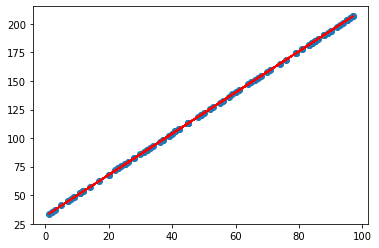

In [25]:
plt.scatter(C,F)
plt.plot(C,y_predict,c='r')
plt.show()